## Part-02: Using CatBoost Model

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

C:\Users\Karthik Shetty\AppData\Local\Temp\ipykernel_23640\659884918.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import catboost
# Print the CatBoost version
print("\n CatBoost version:", catboost.__version__)


 CatBoost version: 1.2.2


In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from catboost import CatBoostClassifier

In [4]:
# Importing the Dataset
student_data = pd.read_csv('../Data/student_data_with_placed_colleges.csv') 

In [5]:
student_data

,Age,Gender,Socioeconomic_Background,Student_Location,SSC_Marks_Percentage,HSC_Marks_Percentage,MHTCET_Scores_Percentile,JEE_Mains_Scores_Percentile,Top_Choices,College,Branch
0,19,Male,OBC,Bandra,53.946493,62.583700,24.386719,38.653710,"[('TCET', 'Civil Engineering', 20.826718691045...",TCET,Civil Engineering
1,18,Male,EWS,Vile Parle,59.583566,38.002831,67.884403,38.883853,"[('TCET', 'Civil Engineering', 64.324403079470...",RCE,Civil Engineering
2,18,Male,ST,Bhayandar,73.727218,82.102009,99.684526,71.373863,"[('F.R. Rodrigues', 'Computer Engineering', 1....",VJTI,Mechanical Engineering
3,19,Male,EWS,PrabhaDevi,68.074357,75.546697,81.841074,96.067422,"[('DJ Sanghvi', 'Mechanical Engineering', 12.4...",LTCE,Electronics and Telecommunication Engineering
4,18,Male,EWS,Grant Road,67.936351,64.903761,45.283188,21.426594,"[('TCET', 'Civil Engineering', 41.723187678185...",RCE,Mechanical Engineering
...,...,...,...,...,...,...,...,...,...,...,...
4995,19,Male,SC,Dahisar,56.116929,33.999959,84.195523,57.112684,"[('LTCE', 'Electronics and Telecommunication E...",RCE,Electronics and Computer Science
4996,18,Male,ST,Kandivali,97.120143,91.329747,66.112436,46.116036,"[('TCET', 'Civil Engineering', 62.552436220201...",RCE,Civil Engineering
4997,19,Male,SC,Santacruz,73.057089,44.918719,49.186189,50.550162,"[('TCET', 'Civil Engineering', 45.626189121662...",RCE,Mechanical Engineering
4998,20,Male,State Quota,Vile Parle,65.558348,48.532749,27.163415,14.354864,"[('TCET', 'Civil Engineering', 23.603415125984...",TCET,Civil Engineering


In [6]:
student_data['Branch'].unique()

array(['Civil Engineering', 'Mechanical Engineering',
       'Electronics and Telecommunication Engineering',
       'Artificial Intelligence and Data Science', 'Not eligible',
       'Computer Engineering', 'Electrical Engineering',
       'Information Technology',
       'Computer Science and Engineering (IoT and Cyber Security)',
       'Electronics and Computer Science', 'Chemical Engineering',
       'Computer Science and Engineering(Cyber Security)'], dtype=object)

In [7]:
student_data['College'].unique()

array(['TCET', 'RCE', 'VJTI', 'LTCE', 'Not eligible', 'XIE'], dtype=object)

In [8]:
# Data Preparation

# Prepare features and target variables
X = student_data[['Age', 'Socioeconomic_Background', 'SSC_Marks_Percentage', 'HSC_Marks_Percentage', 'MHTCET_Scores_Percentile', 'JEE_Mains_Scores_Percentile']]
y_college = student_data['College']
y_branch = student_data['Branch']

# Encode categorical variables (Socioeconomic_Background)
le = LabelEncoder()
X['Socioeconomic_Background'] = le.fit_transform(X['Socioeconomic_Background'])

C:\Users\Karthik Shetty\AppData\Local\Temp\ipykernel_23640\3223123316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Socioeconomic_Background'] = le.fit_transform(X['Socioeconomic_Background'])


In [9]:
# Print the encoded values
print("Encoded values for Socioeconomic_Background:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Encoded values for Socioeconomic_Background:
{'EWS': 0, 'OBC': 1, 'Open': 2, 'SC': 3, 'ST': 4, 'State Quota': 5}


In [10]:
# Train-Test Split and Scaling

# Split the data into training and testing sets
X_train, X_test, y_college_train, y_college_test, y_branch_train, y_branch_test = train_test_split(
    X, y_college, y_branch, test_size=0.2, random_state=42)


In [11]:
# Define categorical features for CatBoost
cat_features = ['Socioeconomic_Background']

In [12]:
college_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass', cat_features=cat_features, random_seed=42)
branch_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass', cat_features=cat_features, random_seed=42)

college_model.fit(X_train, y_college_train)
branch_model.fit(X_train, y_branch_train)

0:	learn: 1.4440108	total: 223ms	remaining: 3m 42s
1:	learn: 1.2343156	total: 292ms	remaining: 2m 25s
2:	learn: 1.0732412	total: 359ms	remaining: 1m 59s
3:	learn: 0.9538640	total: 430ms	remaining: 1m 47s
4:	learn: 0.8612122	total: 496ms	remaining: 1m 38s
5:	learn: 0.7876256	total: 543ms	remaining: 1m 29s
6:	learn: 0.7232042	total: 593ms	remaining: 1m 24s
7:	learn: 0.6649332	total: 637ms	remaining: 1m 19s
8:	learn: 0.6176321	total: 681ms	remaining: 1m 15s
9:	learn: 0.5779974	total: 721ms	remaining: 1m 11s
10:	learn: 0.5370314	total: 759ms	remaining: 1m 8s
11:	learn: 0.5012660	total: 796ms	remaining: 1m 5s
12:	learn: 0.4720256	total: 835ms	remaining: 1m 3s
13:	learn: 0.4479141	total: 871ms	remaining: 1m 1s
14:	learn: 0.4221226	total: 910ms	remaining: 59.8s
15:	learn: 0.4004537	total: 948ms	remaining: 58.3s
16:	learn: 0.3813631	total: 988ms	remaining: 57.1s
17:	learn: 0.3650525	total: 1.02s	remaining: 55.8s
18:	learn: 0.3517959	total: 1.06s	remaining: 54.9s
19:	learn: 0.3401142	total: 1.1

In [13]:
# Inspect the values assigned during one-hot encoding for 'Socioeconomic_Background'
print("Values assigned during one-hot encoding for Socioeconomic_Background:")
print(le.classes_)

# Evaluate CatBoost Models

# Predict College and Branch for the test data
y_college_pred = college_model.predict(X_test)
y_branch_pred = branch_model.predict(X_test)

# Evaluate the models
college_accuracy = accuracy_score(y_college_test, y_college_pred)
branch_accuracy = accuracy_score(y_branch_test, y_branch_pred)

print("College Prediction Accuracy:", college_accuracy)
print("Branch Prediction Accuracy:", branch_accuracy)

Values assigned during one-hot encoding for Socioeconomic_Background:
['EWS' 'OBC' 'Open' 'SC' 'ST' 'State Quota']
College Prediction Accuracy: 0.924
Branch Prediction Accuracy: 0.855


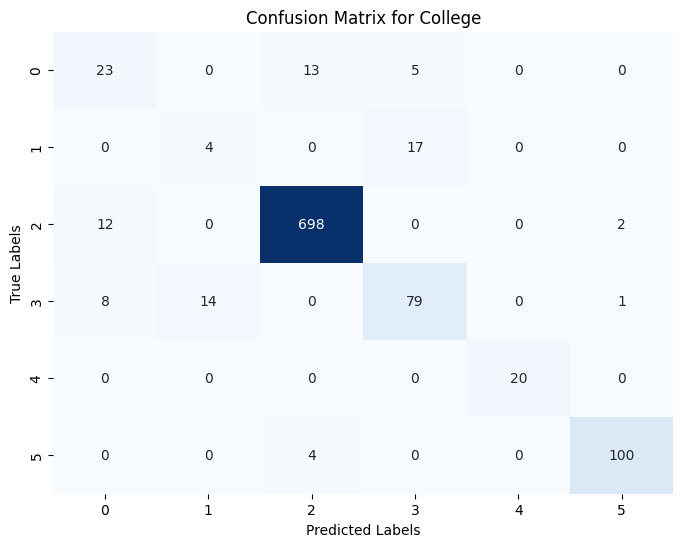

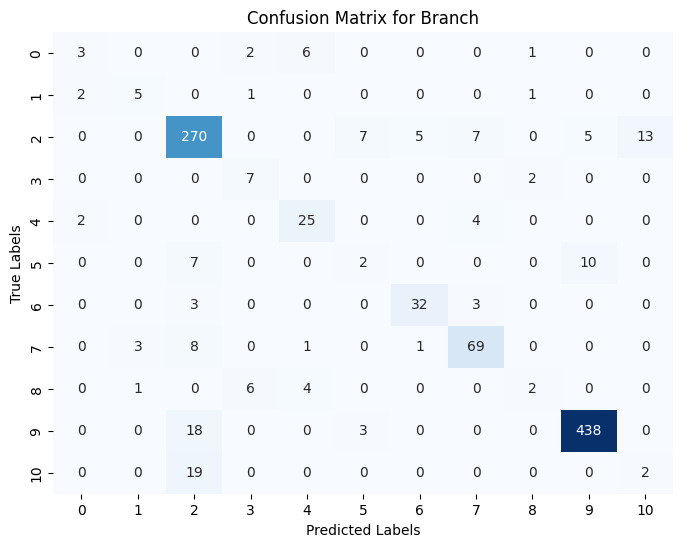

In [14]:
# Model Evaluation
# Add model evaluation using confusion matrices and classification reports
conf_matrix_college = confusion_matrix(y_college_test, y_college_pred)
conf_matrix_branch = confusion_matrix(y_branch_test, y_branch_pred)

# Plot confusion matrix for College
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_college, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for College')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix for Branch
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_branch, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Branch')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Saving the model

In [15]:
# Save college_model
college_model.save_model("../Saved_Models/college_model.cbm")

In [16]:
# Save branch_model
branch_model.save_model("../Saved_Models/branch_model.cbm")